#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import KBinsDiscretizer
from numpy import mean
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

#Import Data

In [4]:
url= 'https://raw.githubusercontent.com/BhargavArunkumar/HR_Attrition/main/HR_.csv'

In [5]:
df_hr = pd.read_csv(url)
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df_hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [7]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df_hr.shape

(14999, 10)

#Null value Check

In [9]:
df_hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [10]:
df_hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

#Defining Target and Independent Features

In [11]:
X = df_hr.drop(['left'], axis = 1)

In [12]:
y = df_hr[['left']]

#Get the Rate of Leaving

In [13]:
y.mean()

left    0.238083
dtype: float64

#Split features into Numerical and Categorical

In [14]:
num = X.select_dtypes(include= ['int64','float64'])
char = X.select_dtypes(include= 'object')

In [15]:
num.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [16]:
char.head()

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


#Dropping the indicator features from num to build a separate DF

In [17]:
num.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [18]:
num.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [19]:
num = num.drop('Work_accident', axis=1)
num.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
0,0.38,0.53,2,157,3,0
1,0.80,0.86,5,262,6,0
2,0.11,0.88,7,272,4,0
3,0.72,0.87,5,223,5,0
4,0.37,0.52,2,159,3,0


#Outlier Analysis of Numerical Features

In [20]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000
1%,0.090000,0.390000,2.000000,104.000000,2.000000,0.000000
5%,0.110000,0.460000,2.000000,130.000000,2.000000,0.000000
10%,0.210000,0.490000,2.000000,137.000000,2.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000


#Capping and Flooring of outliers

In [21]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [22]:
num=num.apply(lambda x : outlier_cap(x))

In [23]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612760,0.716252,3.803054,201.034802,3.498233,0.021268
std,0.248517,0.170873,1.232592,49.771459,1.460136,0.144281
min,0.090000,0.390000,2.000000,104.000000,2.000000,0.000000
1%,0.090000,0.390000,2.000000,104.000000,2.000000,0.000000
5%,0.110000,0.460000,2.000000,130.000000,2.000000,0.000000
10%,0.210000,0.490000,2.000000,137.000000,2.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000


#Feature Selection - Numerical Features

##Part 1 : Remove Features with 0 Variance

In [24]:
varselector = VarianceThreshold(threshold = 0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices = True)
num_1 = num.iloc[:,cols]

In [25]:
num_1.iloc[0]

satisfaction_level         0.38
last_evaluation            0.53
number_project             2.00
average_montly_hours     157.00
time_spend_company         3.00
promotion_last_5years      0.00
Name: 0, dtype: float64

##Part 2 : Bi Variate Analysis (Feature Discretization)

In [26]:
discrete = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head(11)

,satisfaction_level_Rank,last_evaluation_Rank,number_project_Rank,average_montly_hours_Rank,time_spend_company_Rank,promotion_last_5years_Rank
0,1.0,1.0,0.0,2.0,1.0,0.0
1,7.0,7.0,3.0,8.0,3.0,0.0
2,0.0,7.0,3.0,9.0,2.0,0.0
3,6.0,7.0,3.0,6.0,3.0,0.0
4,1.0,1.0,0.0,2.0,1.0,0.0
5,2.0,1.0,0.0,2.0,1.0,0.0
6,0.0,5.0,3.0,7.0,2.0,0.0
7,9.0,7.0,3.0,8.0,3.0,0.0
8,8.0,9.0,3.0,6.0,3.0,0.0
9,2.0,1.0,0.0,1.0,1.0,0.0


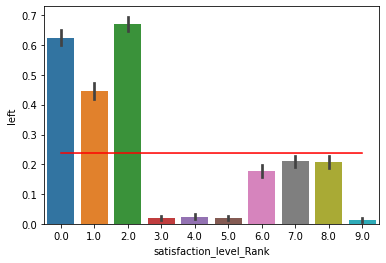

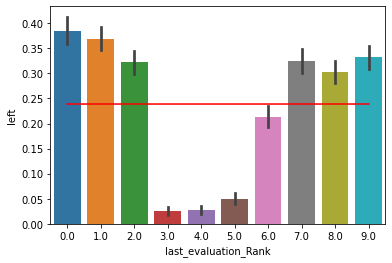

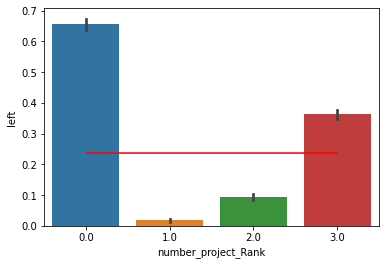

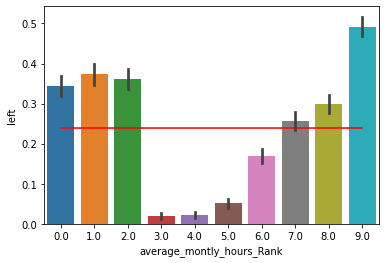

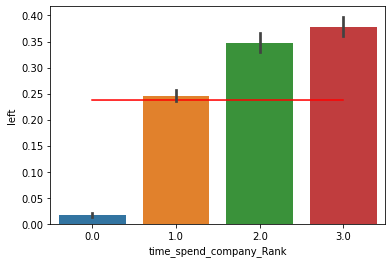

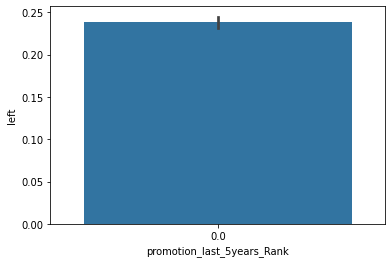

In [27]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

X_bin_combined=pd.concat([y,num_binned],axis=1,join='inner')

for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_bin_combined['left'].mean(),data= X_bin_combined, color = 'red')
    sns.barplot(x=col, y="left",data=X_bin_combined, estimator=mean )
plt.show()

In [28]:
# All features from num_1 except for 'promotion_last_5years' will get selected due to good discrimination.

# Select K Best for Numerical Features
selector = SelectKBest(chi2, k=4)
X_new = selector.fit_transform(num_1, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]

In [29]:
select_features_df_num.loc[:0]

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years
0,0.38,157,3,0


In [30]:
select_features_df_num.shape

(14999, 4)

#Feature Selection - Categorical Features

In [31]:
char.head()

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [32]:
char.shape

(14999, 2)

## Part 1 - Bi Variate Analysis

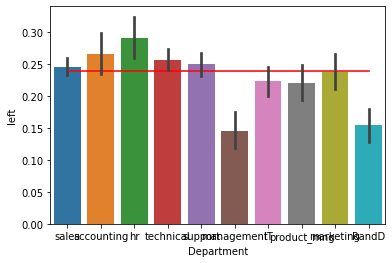

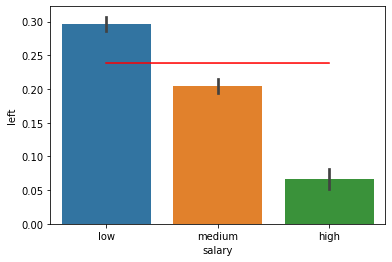

In [33]:
X_char_merged = pd.concat([y,char],axis=1,join='inner')

for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['left'].mean(),data= X_char_merged, color = 'red')
    sns.barplot(x=col, y="left",data=X_char_merged, estimator=mean )
plt.show()

In [34]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(14999, 11)

In [35]:
X_char_dum.head()

,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


##Part 2 - Select K Best

In [36]:
# Select K Best for Categorical Features
selector = SelectKBest(chi2, k=11)
selector.fit_transform(X_char_dum, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [37]:
select_features_df_char.iloc[0]

Department_RandD          0
Department_accounting     0
Department_hr             0
Department_management     0
Department_marketing      0
Department_product_mng    0
Department_sales          1
Department_support        0
Department_technical      0
salary_low                1
salary_medium             0
Name: 0, dtype: uint8

# Creating the Master Feature Set for Model Development

In [38]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [39]:
y['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X_all, y, test_size=0.3, random_state=10)

In [41]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (10499, 15)
Shape of Testing Data (4500, 15)
Response Rate in Training Data left    0.236118
dtype: float64
Response Rate in Testing Data left    0.242667
dtype: float64


In [42]:
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Department_RandD,-0.618338
1,Department_accounting,0.102372
2,Department_hr,0.345870
3,Department_management,-0.509129
4,Department_marketing,-0.096953
5,Department_product_mng,0.051402
6,Department_sales,-0.032802
7,Department_support,0.170848
8,Department_technical,0.079825
9,salary_low,1.226354


In [44]:
# Building a Decision Tree Model
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [45]:
np.random.seed(44)
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 7, 'min_samples_split': 100}


In [46]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [47]:
# Building a Random Forest Model
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
satisfaction_level,0.545905
time_spend_company,0.222563
average_montly_hours,0.184699
salary_low,0.024412
salary_medium,0.007321
promotion_last_5years,0.003480
Department_RandD,0.003284
Department_sales,0.002189
Department_management,0.001942
Department_support,0.001114


In [49]:
# Building a Gradient Boosting Model
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=50,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [50]:
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
satisfaction_level,0.524487
time_spend_company,0.309184
average_montly_hours,0.156301
salary_low,0.001987
Department_support,0.001567
Department_technical,0.001205
Department_management,0.000957
Department_hr,0.000849
promotion_last_5years,0.000825
salary_medium,0.000756


In [51]:
base_learners = [
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)),
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50))  
                       ] 

In [52]:
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [53]:
clf.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=6,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=50,
                                       

In [54]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_stacking=clf.predict(X_test)

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.7655555555555555
Precision 0.5339449541284403
Recall 0.2664835164835165
f1_score 0.35552840562003657


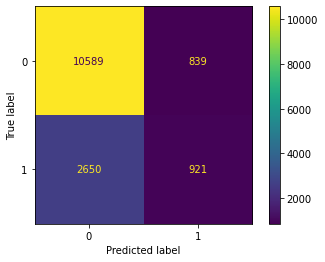

In [56]:
metrics.plot_confusion_matrix(logreg,X_all,y, values_format='d')

In [57]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9688888888888889
Precision 0.9612403100775194
Recall 0.9084249084249084
f1_score 0.9340866290018832


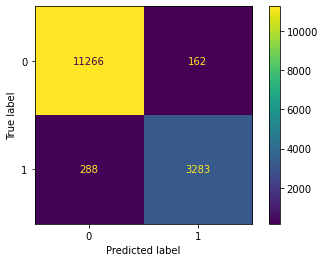

In [58]:
metrics.plot_confusion_matrix(dtree,X_all,y, values_format='d')

In [59]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9128888888888889
Precision 0.9557291666666666
Recall 0.6721611721611722
f1_score 0.7892473118279569


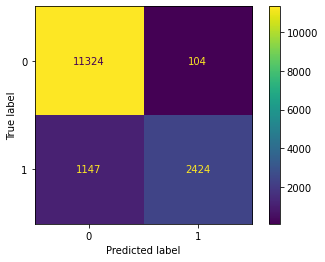

In [60]:
metrics.plot_confusion_matrix(rf,X_all,y, values_format='d')

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9726666666666667
Precision 0.9636363636363636
Recall 0.9221611721611722
f1_score 0.9424426766495086


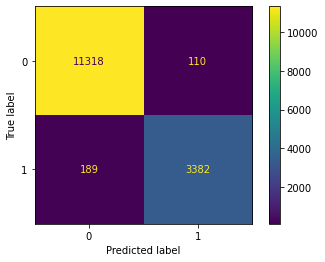

In [62]:
metrics.plot_confusion_matrix(gbm,X_all,y, values_format='d')

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacking))
print("Precision",metrics.precision_score(y_test,y_pred_stacking))
print("Recall",metrics.recall_score(y_test,y_pred_stacking))
print("f1_score",metrics.f1_score(y_test,y_pred_stacking))

Accuracy: 0.9722222222222222
Precision 0.9662487945998072
Recall 0.9175824175824175
f1_score 0.9412869891968061


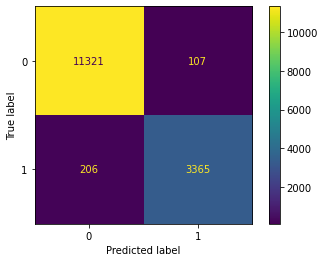

In [64]:
metrics.plot_confusion_matrix(clf,X_all,y, values_format= 'd')

# Lorenz Curve

In [65]:
# Logistic Regression Lorenz Curve

In [66]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df_hr['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df_hr['P_Rank_logreg']=pd.qcut(df_hr['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df_hr.groupby('P_Rank_logreg')['left'].agg(['count','mean'])
rank_df_predicted=df_hr.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_logreg,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile,Lift_over_Avg
0,10,1500,0.590667,0.670260,886.0,886.0,0.248110,0.248110,614.0,614.0,0.053728,0.053728,0.1944,0.100007,0.100007,1,2.480932
1,9,1500,0.481333,0.444428,722.0,1608.0,0.202184,0.450294,778.0,1392.0,0.068078,0.121806,0.3285,0.100007,0.200013,2,2.021708
2,8,1500,0.430667,0.325459,646.0,2254.0,0.180902,0.631196,854.0,2246.0,0.074729,0.196535,0.4347,0.100007,0.300020,3,1.808896
3,7,1500,0.262000,0.249587,393.0,2647.0,0.110053,0.741249,1107.0,3353.0,0.096867,0.293402,0.4478,0.100007,0.400027,4,1.100459
4,6,1499,0.164109,0.195772,246.0,2893.0,0.068888,0.810137,1253.0,4606.0,0.109643,0.403045,0.4071,0.099940,0.499967,5,0.689296
5,5,1500,0.208667,0.156686,313.0,3206.0,0.087651,0.897788,1187.0,5793.0,0.103868,0.506913,0.3909,0.100007,0.599973,6,0.876447
6,4,1500,0.130667,0.123925,196.0,3402.0,0.054887,0.952674,1304.0,7097.0,0.114106,0.621019,0.3317,0.100007,0.699980,7,0.548829
7,3,1500,0.074000,0.095887,111.0,3513.0,0.031084,0.983758,1389.0,8486.0,0.121544,0.742562,0.2412,0.100007,0.799987,8,0.310817
8,2,1500,0.026000,0.070787,39.0,3552.0,0.010921,0.994679,1461.0,9947.0,0.127844,0.870406,0.1243,0.100007,0.899993,9,0.109206
9,1,1500,0.012667,0.042042,19.0,3571.0,0.005321,1.000000,1481.0,11428.0,0.129594,1.000000,0.0000,0.100007,1.000000,10,0.053203


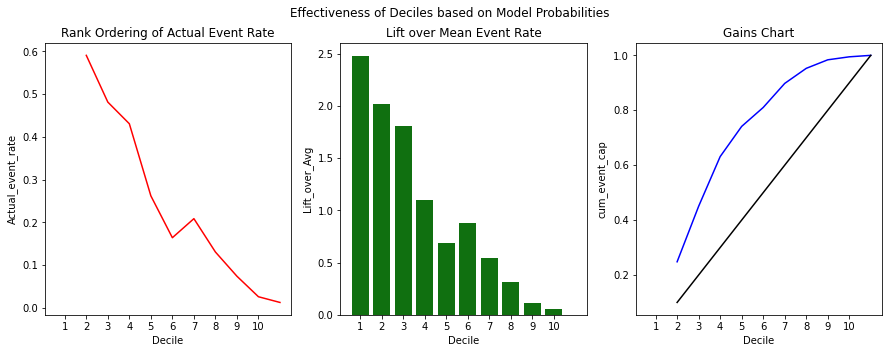

In [67]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0],  x="Decile", y="Actual_event_rate", data=sorted_reindexed,color='red')
sns.barplot(ax=axes[1],  x="Decile", y="Lift_over_Avg", data=sorted_reindexed,color='green')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_event_cap", data=sorted_reindexed,color='blue')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_random_cap", data=sorted_reindexed,color='black')

In [68]:
# Decision Tree Lorenz Curve

In [69]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df_hr['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df_hr['P_Rank_tree']=pd.qcut(df_hr['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df_hr.groupby('P_Rank_tree')['left'].agg(['count','mean'])
rank_df_predicted=df_hr.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_tree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile,Lift_over_Avg
0,10,1500,0.996667,0.984014,1495.0,1495.0,0.418650,0.418650,5.0,5.0,0.000438,0.000438,0.4182,0.100007,0.100007,1,4.186223
1,9,1500,0.900000,0.936239,1350.0,2845.0,0.378045,0.796696,150.0,155.0,0.013126,0.013563,0.7831,0.100007,0.200013,2,3.780202
2,8,1500,0.369333,0.358302,554.0,3399.0,0.155139,0.951834,946.0,1101.0,0.082779,0.096342,0.8555,0.100007,0.300020,3,1.551283
3,7,1500,0.052667,0.041276,79.0,3478.0,0.022123,0.973957,1421.0,2522.0,0.124344,0.220686,0.7533,0.100007,0.400027,4,0.221212
4,6,1499,0.030020,0.012431,45.0,3523.0,0.012602,0.986558,1454.0,3976.0,0.127231,0.347917,0.6386,0.099940,0.499967,5,0.126091
5,5,1500,0.007333,0.006308,11.0,3534.0,0.003080,0.989639,1489.0,5465.0,0.130294,0.478211,0.5114,0.100007,0.599973,6,0.030802
6,4,1500,0.000000,0.006308,0.0,3534.0,0.000000,0.989639,1500.0,6965.0,0.131257,0.609468,0.3802,0.100007,0.699980,7,0.000000
7,3,1500,0.000000,0.006308,0.0,3534.0,0.000000,0.989639,1500.0,8465.0,0.131257,0.740725,0.2489,0.100007,0.799987,8,0.000000
8,2,1500,0.000000,0.006308,0.0,3534.0,0.000000,0.989639,1500.0,9965.0,0.131257,0.871981,0.1177,0.100007,0.899993,9,0.000000
9,1,1500,0.024667,0.003141,37.0,3571.0,0.010361,1.000000,1463.0,11428.0,0.128019,1.000000,-0.0000,0.100007,1.000000,10,0.103606


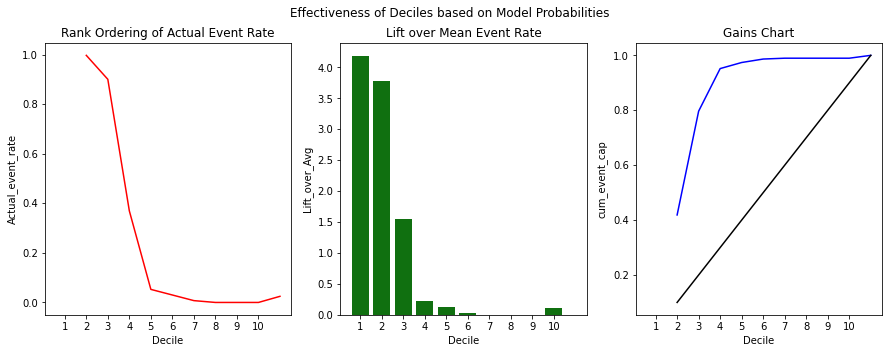

In [70]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0],  x="Decile", y="Actual_event_rate", data=sorted_reindexed,color='red')
sns.barplot(ax=axes[1],  x="Decile", y="Lift_over_Avg", data=sorted_reindexed,color='green')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_event_cap", data=sorted_reindexed,color='blue')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_random_cap", data=sorted_reindexed,color='black')

In [71]:
# Random Forest Lorenz Curve

In [72]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df_hr['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df_hr['P_Rank_rf']=pd.qcut(df_hr['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df_hr.groupby('P_Rank_rf')['left'].agg(['count','mean'])
rank_df_predicted=df_hr.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_rf,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile,Lift_over_Avg
0,10,1500,0.988667,0.750691,1483.0,1483.0,0.415290,0.415290,17.0,17.0,0.001488,0.001488,0.4138,0.100007,0.100007,1,4.152621
1,9,1500,0.823333,0.577589,1235.0,2718.0,0.345842,0.761131,265.0,282.0,0.023189,0.024676,0.7365,0.100007,0.200013,2,3.458184
2,8,1500,0.432000,0.356759,648.0,3366.0,0.181462,0.942593,852.0,1134.0,0.074554,0.099230,0.8434,0.100007,0.300020,3,1.814497
3,7,1500,0.059333,0.216904,89.0,3455.0,0.024923,0.967516,1411.0,2545.0,0.123469,0.222699,0.7448,0.100007,0.400027,4,0.249213
4,6,1499,0.033356,0.131176,50.0,3505.0,0.014002,0.981518,1449.0,3994.0,0.126794,0.349492,0.6320,0.099940,0.499967,5,0.140101
5,5,1500,0.015333,0.103382,23.0,3528.0,0.006441,0.987959,1477.0,5471.0,0.129244,0.478736,0.5092,0.100007,0.599973,6,0.064403
6,4,1500,0.009333,0.083714,14.0,3542.0,0.003920,0.991879,1486.0,6957.0,0.130032,0.608768,0.3831,0.100007,0.699980,7,0.039202
7,3,1500,0.009333,0.066057,14.0,3556.0,0.003920,0.995799,1486.0,8443.0,0.130032,0.738799,0.2570,0.100007,0.799987,8,0.039202
8,2,1500,0.004667,0.049203,7.0,3563.0,0.001960,0.997760,1493.0,9936.0,0.130644,0.869443,0.1283,0.100007,0.899993,9,0.019601
9,1,1500,0.005333,0.032684,8.0,3571.0,0.002240,1.000000,1492.0,11428.0,0.130557,1.000000,0.0000,0.100007,1.000000,10,0.022401


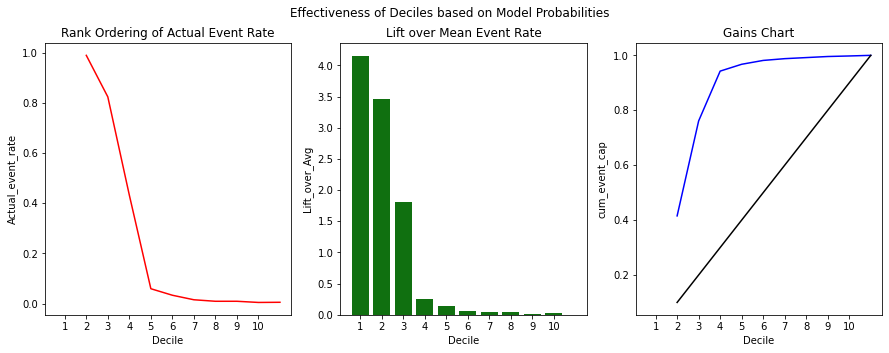

In [73]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0],  x="Decile", y="Actual_event_rate", data=sorted_reindexed,color='red')
sns.barplot(ax=axes[1],  x="Decile", y="Lift_over_Avg", data=sorted_reindexed,color='green')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_event_cap", data=sorted_reindexed,color='blue')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_random_cap", data=sorted_reindexed,color='black')

In [74]:
# Gradient Boost Lorenz Curve

In [75]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df_hr['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df_hr['P_Rank_GBM']=pd.qcut(df_hr['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df_hr.groupby('P_Rank_GBM')['left'].agg(['count','mean'])
rank_df_predicted=df_hr.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_GBM,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile,Lift_over_Avg
0,10,1500,0.996667,0.991113,1495.0,1495.0,0.418650,0.418650,5.0,5.0,0.000438,0.000438,0.4182,0.100007,0.100007,1,4.186223
1,9,1500,0.977333,0.952511,1466.0,2961.0,0.410529,0.829180,34.0,39.0,0.002975,0.003413,0.8258,0.100007,0.200013,2,4.105019
2,8,1500,0.370667,0.359112,556.0,3517.0,0.155699,0.984878,944.0,983.0,0.082604,0.086017,0.8989,0.100007,0.300020,3,1.556883
3,7,1500,0.017333,0.027413,26.0,3543.0,0.007281,0.992159,1474.0,2457.0,0.128981,0.214998,0.7772,0.100007,0.400027,4,0.072804
4,6,1499,0.006671,0.012232,10.0,3553.0,0.002800,0.994959,1489.0,3946.0,0.130294,0.345292,0.6497,0.099940,0.499967,5,0.028020
5,5,1500,0.002000,0.007632,3.0,3556.0,0.000840,0.995799,1497.0,5443.0,0.130994,0.476286,0.5195,0.100007,0.599973,6,0.008400
6,4,1500,0.004000,0.005260,6.0,3562.0,0.001680,0.997480,1494.0,6937.0,0.130732,0.607018,0.3905,0.100007,0.699980,7,0.016801
7,3,1500,0.000667,0.003746,1.0,3563.0,0.000280,0.997760,1499.0,8436.0,0.131169,0.738187,0.2596,0.100007,0.799987,8,0.002800
8,2,1500,0.005333,0.002454,8.0,3571.0,0.002240,1.000000,1492.0,9928.0,0.130557,0.868743,0.1313,0.100007,0.899993,9,0.022401
9,1,1500,0.000000,0.001180,0.0,3571.0,0.000000,1.000000,1500.0,11428.0,0.131257,1.000000,0.0000,0.100007,1.000000,10,0.000000


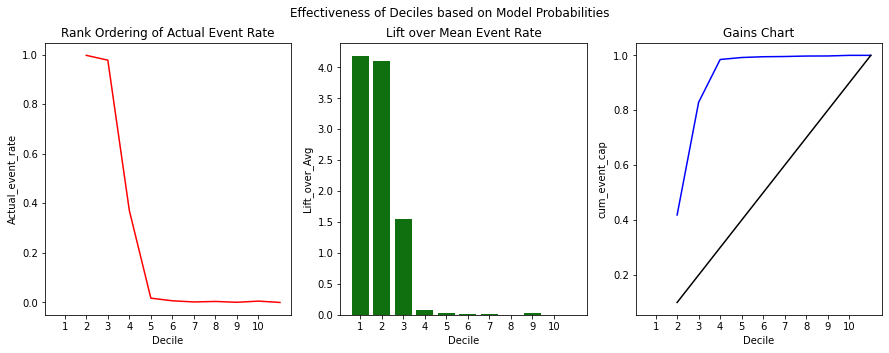

In [76]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0],  x="Decile", y="Actual_event_rate", data=sorted_reindexed,color='red')
sns.barplot(ax=axes[1],  x="Decile", y="Lift_over_Avg", data=sorted_reindexed,color='green')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_event_cap", data=sorted_reindexed,color='blue')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_random_cap", data=sorted_reindexed,color='black')

In [77]:
df_hr['satisfaction_level_Rank']=pd.qcut(df_hr['satisfaction_level'].rank(method='first').values,10,duplicates='drop').codes+1

In [78]:
df_hr.groupby('satisfaction_level_Rank')['satisfaction_level'].agg(['min','max','mean'])

,min,max,mean
satisfaction_level_Rank,,,
1,0.09,0.21,0.127427
2,0.21,0.40,0.332527
3,0.40,0.49,0.441347
4,0.49,0.57,0.528767
5,0.57,0.64,0.605913
6,0.64,0.72,0.682175
7,0.72,0.78,0.751507
8,0.78,0.85,0.815713
9,0.85,0.92,0.883487


In [79]:
df_hr['satisfaction_level'].mean()

0.6128335222348166

In [80]:
df_hr['Satisfaction_level_Segment']=np.where(df_hr['satisfaction_level_Rank']<=6,"Low satisfaction_level","High satisfaction_level")

In [81]:
df_hr['average_montly_hours_Rank']=pd.qcut(df_hr['average_montly_hours'].rank(method='first').values,10,duplicates='drop').codes+1

In [82]:
df_hr.groupby('average_montly_hours_Rank')['average_montly_hours'].agg(['min','max','mean'])

,min,max,mean
average_montly_hours_Rank,,,
1,96,137,125.373333
2,137,150,143.864667
3,150,162,155.946667
4,162,181,171.501333
5,181,200,190.243333
6,200,220,210.112075
7,220,238,228.696000
8,238,253,245.042667
9,253,267,259.685333


In [83]:
df_hr['average_montly_hours'].mean()

201.0503366891126

In [84]:
df_hr['average_montly_hours_Segment']=np.where(df_hr['average_montly_hours_Rank']<=5,"Low Time","High Time")

In [85]:
df_hr['attrition_Rank']=np.where(df_hr['P_Rank_GBM']>=8,"Top 3","Bottom 7")

# Slice the data with respect to Top 3  Ranks from the GBM Model output

In [86]:
df_top3 = df_hr.loc[df_hr['attrition_Rank']=='Top 3',:]
df_top3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,pred_prob_logreg,P_Rank_logreg,pred_prob_dtree,P_Rank_tree,pred_prob_rf,P_Rank_rf,pred_prob_gbm,P_Rank_GBM,satisfaction_level_Rank,Satisfaction_level_Segment,average_montly_hours_Rank,average_montly_hours_Segment,attrition_Rank
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.400222,9,0.960432,9,0.735946,10,0.979510,10,2,Low satisfaction_level,3,Low Time,Top 3
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.144953,5,0.891176,8,0.288764,7,0.904635,8,8,High satisfaction_level,9,High Time,Top 3
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.595128,10,1.000000,10,0.676644,9,0.997180,10,1,Low satisfaction_level,10,High Time,Top 3
3,0.72,0.87,5,223,5,0,1,0,sales,low,0.225209,7,0.891176,8,0.418786,8,0.909920,9,6,Low satisfaction_level,7,High Time,Top 3
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.409358,9,0.960432,9,0.735946,10,0.979176,10,2,Low satisfaction_level,3,Low Time,Top 3


In [87]:
reason_list = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'promotion_last_5years','salary']

In [88]:
df_top3_reasons = df_top3[reason_list]

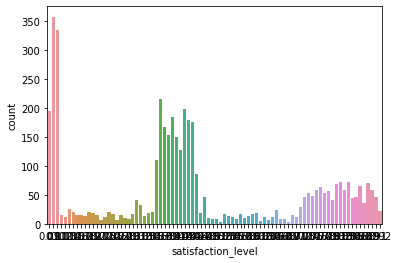

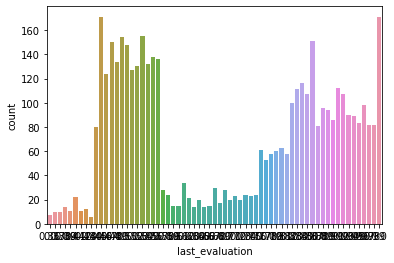

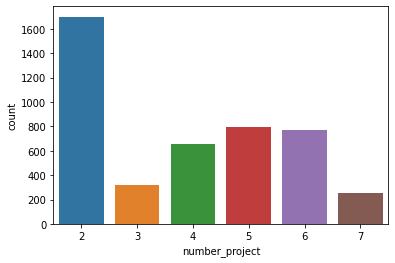

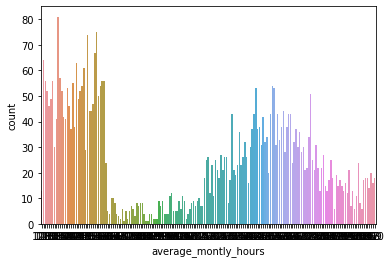

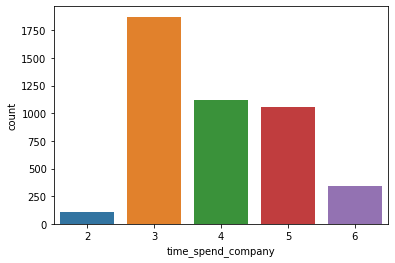

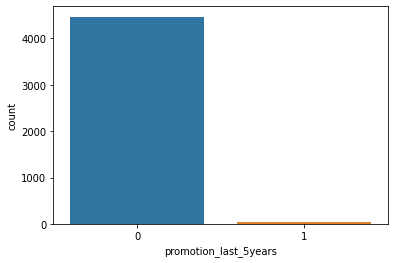

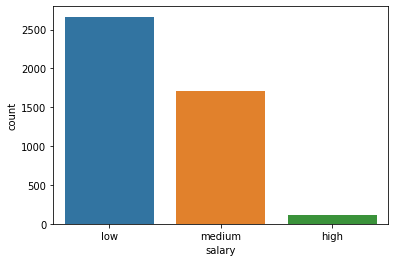

In [89]:
for col in (df_top3_reasons.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top3_reasons)
plt.show()

In [90]:
pd.crosstab(index=df_top3['average_montly_hours_Segment'], columns=df_top3['Satisfaction_level_Segment'],values=df_top3['average_montly_hours'],aggfunc='mean')

Satisfaction_level_Segment,High satisfaction_level,Low satisfaction_level
average_montly_hours_Segment,,
High Time,246.420176,264.282520
Low Time,168.233766,146.723261


In [91]:
pd.crosstab(index=df_top3['average_montly_hours_Segment'], columns=df_top3['Satisfaction_level_Segment'],values=df_top3['average_montly_hours'],aggfunc='count')

Satisfaction_level_Segment,High satisfaction_level,Low satisfaction_level
average_montly_hours_Segment,,
High Time,1021,1476
Low Time,77,1926


In [92]:
pd.crosstab(index=df_top3['time_spend_company'], columns=df_top3['Satisfaction_level_Segment'],values=df_top3['time_spend_company'],aggfunc='count')

Satisfaction_level_Segment,High satisfaction_level,Low satisfaction_level
time_spend_company,,
2,22,88
3,33,1839
4,58,1062
5,740,316
6,245,97


In [93]:
df_hr.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['min','max','mean'])

,min,max,mean
P_Rank_GBM,,,
1,0.000016,0.001820,0.001180
2,0.001823,0.003079,0.002454
3,0.003079,0.004411,0.003746
4,0.004412,0.006242,0.005260
5,0.006253,0.009327,0.007632
6,0.009331,0.016411,0.012232
7,0.016411,0.048569,0.027413
8,0.048594,0.908534,0.359112
9,0.908534,0.975455,0.952511


# Concluding Notes


  1) The HR Team or the Managres can target employees that fall in the "Top 3" deciles and distribute the working hours accordingly.
  
  
  2) Followed by the employees that fall in the Mid 2 deciles


---


***Prbability Cutoff to be applied is:***

  1) Phase-1: Focus on the Prob value >=0.908534


  2) Phase-2: Focus on the Prob value >=0.016411 and <=0.908534



